## Setting Up Notebook and Preparing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import sleep
from tqdm import tqdm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import ResidualsPlot

/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Read in the csv file containing the cleaned data
df = pd.read_csv('../data/Cleaned_Training_Set.csv', header=0)
df = df.drop('Unnamed: 0', axis=1)
df

,country,year,World bank region,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
0,Afghanistan,1972,South Asia,Low income,0.000000e+00,2.233065e+07,11644377.0,2.794796,17.853176,88.0702,11.9298,10255226.0,1389151.0,6.634620,1855690
1,Afghanistan,1973,South Asia,Low income,0.000000e+00,2.654146e+07,11966352.0,2.727531,18.346829,87.6208,12.3792,10485013.0,1481339.0,6.425364,1942479
2,Afghanistan,1974,South Asia,Low income,0.000000e+00,6.606462e+07,12273589.0,2.535101,18.817885,87.1714,12.8286,10699059.0,1574530.0,6.101041,2014500
3,Afghanistan,1975,South Asia,Low income,0.000000e+00,6.882184e+07,12551790.0,2.241357,19.244423,86.7220,13.2780,10885163.0,1666627.0,5.684501,2066033
4,Afghanistan,1976,South Asia,Low income,0.000000e+00,6.463635e+07,12806810.0,2.011378,19.635420,86.2426,13.7574,11044926.0,1761884.0,5.558187,2064276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,Zimbabwe,1998,Sub-Saharan Africa,Low income,3.574371e+06,2.922644e+06,12229500.0,1.513394,31.613028,67.0524,32.9476,8200173.0,4029327.0,2.750848,4438019
6467,Zimbabwe,1999,Sub-Saharan Africa,Low income,1.121581e+07,0.000000e+00,12384727.0,1.261295,32.014287,66.6472,33.3528,8254074.0,4130653.0,2.483614,4498365
6468,Zimbabwe,2000,Sub-Saharan Africa,Low income,2.259094e+07,1.635434e+06,12503652.0,0.955674,32.321706,66.2420,33.7580,8282669.0,4220983.0,2.163253,4558017
6469,Zimbabwe,2001,Sub-Saharan Africa,Low income,1.491629e+07,2.523939e+07,12586763.0,0.662494,32.536546,65.8216,34.1784,8284809.0,4301954.0,1.900130,4620705


In [3]:
# Since all the countries in the preview are "Low income", we are looking for one in a different category that we can
# test later to ensure that our ordinal income feature is correctly mapped.
df.iloc[50,3]

'Upper middle income'

In order to use categorical features in our model, we will need to assign them a numerical value, which is done in the two cells below.

In [4]:
mapper = {'High income': 3, 'Upper middle income': 2, 'Lower middle income': 1, 'Low income': 0}
df['World bank, 4 income groups 2017'] = df['World bank, 4 income groups 2017'].replace(mapper)

In [5]:
df

,country,year,World bank region,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
0,Afghanistan,1972,South Asia,0,0.000000e+00,2.233065e+07,11644377.0,2.794796,17.853176,88.0702,11.9298,10255226.0,1389151.0,6.634620,1855690
1,Afghanistan,1973,South Asia,0,0.000000e+00,2.654146e+07,11966352.0,2.727531,18.346829,87.6208,12.3792,10485013.0,1481339.0,6.425364,1942479
2,Afghanistan,1974,South Asia,0,0.000000e+00,6.606462e+07,12273589.0,2.535101,18.817885,87.1714,12.8286,10699059.0,1574530.0,6.101041,2014500
3,Afghanistan,1975,South Asia,0,0.000000e+00,6.882184e+07,12551790.0,2.241357,19.244423,86.7220,13.2780,10885163.0,1666627.0,5.684501,2066033
4,Afghanistan,1976,South Asia,0,0.000000e+00,6.463635e+07,12806810.0,2.011378,19.635420,86.2426,13.7574,11044926.0,1761884.0,5.558187,2064276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,Zimbabwe,1998,Sub-Saharan Africa,0,3.574371e+06,2.922644e+06,12229500.0,1.513394,31.613028,67.0524,32.9476,8200173.0,4029327.0,2.750848,4438019
6467,Zimbabwe,1999,Sub-Saharan Africa,0,1.121581e+07,0.000000e+00,12384727.0,1.261295,32.014287,66.6472,33.3528,8254074.0,4130653.0,2.483614,4498365
6468,Zimbabwe,2000,Sub-Saharan Africa,0,2.259094e+07,1.635434e+06,12503652.0,0.955674,32.321706,66.2420,33.7580,8282669.0,4220983.0,2.163253,4558017
6469,Zimbabwe,2001,Sub-Saharan Africa,0,1.491629e+07,2.523939e+07,12586763.0,0.662494,32.536546,65.8216,34.1784,8284809.0,4301954.0,1.900130,4620705


In [6]:
# Testing to ensure that a our 'Upper middle income' sample country is correctly mapped.
df.iloc[50,3]

2

In [7]:
df_dummies = pd.get_dummies(df, columns=['country', 'World bank region'])
df_dummies

,year,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,...,"country_Yemen, Rep.",country_Zambia,country_Zimbabwe,World bank region_East Asia & Pacific,World bank region_Europe & Central Asia,World bank region_Latin America & Caribbean,World bank region_Middle East & North Africa,World bank region_North America,World bank region_South Asia,World bank region_Sub-Saharan Africa
0,1972,0,0.000000e+00,2.233065e+07,11644377.0,2.794796,17.853176,88.0702,11.9298,10255226.0,...,0,0,0,0,0,0,0,0,1,0
1,1973,0,0.000000e+00,2.654146e+07,11966352.0,2.727531,18.346829,87.6208,12.3792,10485013.0,...,0,0,0,0,0,0,0,0,1,0
2,1974,0,0.000000e+00,6.606462e+07,12273589.0,2.535101,18.817885,87.1714,12.8286,10699059.0,...,0,0,0,0,0,0,0,0,1,0
3,1975,0,0.000000e+00,6.882184e+07,12551790.0,2.241357,19.244423,86.7220,13.2780,10885163.0,...,0,0,0,0,0,0,0,0,1,0
4,1976,0,0.000000e+00,6.463635e+07,12806810.0,2.011378,19.635420,86.2426,13.7574,11044926.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,1998,0,3.574371e+06,2.922644e+06,12229500.0,1.513394,31.613028,67.0524,32.9476,8200173.0,...,0,0,1,0,0,0,0,0,0,1
6467,1999,0,1.121581e+07,0.000000e+00,12384727.0,1.261295,32.014287,66.6472,33.3528,8254074.0,...,0,0,1,0,0,0,0,0,0,1
6468,2000,0,2.259094e+07,1.635434e+06,12503652.0,0.955674,32.321706,66.2420,33.7580,8282669.0,...,0,0,1,0,0,0,0,0,0,1
6469,2001,0,1.491629e+07,2.523939e+07,12586763.0,0.662494,32.536546,65.8216,34.1784,8284809.0,...,0,0,1,0,0,0,0,0,0,1


In [8]:
# Assign predictors to X and target feature to y
X = df_dummies.drop('Urban population 5 years in the future', axis=1)
y = df_dummies['Urban population 5 years in the future']

## Train-Test Split

In [9]:
rand_state=18

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

## Preparing 2003 Data for Predictions

In [11]:
# Reading in 2003 dataframe
df_2003 = pd.read_csv('../data/data_2003.csv', header=0)
df_2003 = df_2003.drop('Unnamed: 0', axis=1)
df_2003

,country,year,World bank region,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
0,Afghanistan,2003,South Asia,Low income,0.000000e+00,2.049705e+05,23116142.0,4.031248,35.441703,78.6376,21.3624,18177979.0,4938163.0,5.254873,720689.0
1,Albania,2003,Europe & Central Asia,Upper middle income,0.000000e+00,4.692363e+07,3033659.0,-0.583987,110.717482,55.2212,44.7788,1675223.0,1358436.0,1.703278,6178697.0
2,Algeria,2003,Middle East & North Africa,Upper middle income,1.792483e+07,1.460891e+10,33003442.0,1.312884,13.856862,35.6718,64.3282,11772922.0,21230520.0,3.164894,20277.0
3,American Samoa,2003,East Asia & Pacific,Upper middle income,0.000000e+00,0.000000e+00,59117.0,0.658489,295.585000,9.7238,90.2762,5748.0,53369.0,1.217826,22319.0
4,Andorra,2003,Europe & Central Asia,High income,0.000000e+00,0.000000e+00,75643.0,5.438529,160.942553,8.8650,91.1350,6706.0,68937.0,4.978505,1027593.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Virgin Islands (U.S.),2003,Latin America & Caribbean,High income,0.000000e+00,0.000000e+00,108085.0,-0.113735,308.814286,6.4258,93.5742,6945.0,101140.0,0.225685,0.0
206,West Bank and Gaza,2003,Middle East & North Africa,Lower middle income,0.000000e+00,0.000000e+00,3154969.0,2.555248,524.081229,27.3758,72.6242,863698.0,2291271.0,2.856446,875444.0
207,"Yemen, Rep.",2003,Middle East & North Africa,Lower middle income,0.000000e+00,2.585782e+09,19081306.0,2.818175,36.140891,72.1316,27.8684,13763651.0,5317655.0,4.752199,1442678.0
208,Zambia,2003,Sub-Saharan Africa,Lower middle income,3.429587e+07,5.705385e+05,10894519.0,2.501029,14.655186,64.1120,35.8880,6984694.0,3909825.0,3.514839,1023611.0


In [12]:
# Using the mapper from the first part for ordinal income group feature
df_2003['World bank, 4 income groups 2017'] = df_2003['World bank, 4 income groups 2017'].replace(mapper)

In [13]:
# Dropping the empty column that we will attempt to predict
df_2003.drop('Urban population 5 years in the future', axis=1, inplace=True)

In [14]:
# Getting dummies for "country" and "World bank region" columns so that data is the same shape
df_2003_X = pd.get_dummies(df_2003, columns=['country', 'World bank region'])
df_2003_X

,year,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,...,"country_Yemen, Rep.",country_Zambia,country_Zimbabwe,World bank region_East Asia & Pacific,World bank region_Europe & Central Asia,World bank region_Latin America & Caribbean,World bank region_Middle East & North Africa,World bank region_North America,World bank region_South Asia,World bank region_Sub-Saharan Africa
0,2003,0,0.000000e+00,2.049705e+05,23116142.0,4.031248,35.441703,78.6376,21.3624,18177979.0,...,0,0,0,0,0,0,0,0,1,0
1,2003,2,0.000000e+00,4.692363e+07,3033659.0,-0.583987,110.717482,55.2212,44.7788,1675223.0,...,0,0,0,0,1,0,0,0,0,0
2,2003,2,1.792483e+07,1.460891e+10,33003442.0,1.312884,13.856862,35.6718,64.3282,11772922.0,...,0,0,0,0,0,0,1,0,0,0
3,2003,2,0.000000e+00,0.000000e+00,59117.0,0.658489,295.585000,9.7238,90.2762,5748.0,...,0,0,0,1,0,0,0,0,0,0
4,2003,3,0.000000e+00,0.000000e+00,75643.0,5.438529,160.942553,8.8650,91.1350,6706.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2003,3,0.000000e+00,0.000000e+00,108085.0,-0.113735,308.814286,6.4258,93.5742,6945.0,...,0,0,0,0,0,1,0,0,0,0
206,2003,1,0.000000e+00,0.000000e+00,3154969.0,2.555248,524.081229,27.3758,72.6242,863698.0,...,0,0,0,0,0,0,1,0,0,0
207,2003,1,0.000000e+00,2.585782e+09,19081306.0,2.818175,36.140891,72.1316,27.8684,13763651.0,...,1,0,0,0,0,0,1,0,0,0
208,2003,1,3.429587e+07,5.705385e+05,10894519.0,2.501029,14.655186,64.1120,35.8880,6984694.0,...,0,1,0,0,0,0,0,0,0,1


---

# 1. Model 0: Basic Linear Regression--No Tuning

In [15]:
# The score attribute of scikit-learn's LinearRegression is R-squared
# R-Squared = Explained variance of the model / Total variance of the target variable
# We also want to look at RMSE
reg0 = LinearRegression()
reg0.fit(X_train, y_train)
y_pred_lin = reg0.predict(X_test)
r_squared_linreg0 = reg0.score(X_test, y_test)
rmse0 = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print('R-squared:', r_squared_linreg0)
print('Root Mean Squared Error:', rmse0)

R-squared: 0.9993746424804435
Root Mean Squared Error: 896616.417704763


In [16]:
cv_scores = cross_val_score(reg0, X_train, y_train, cv=5)
cv_scores

array([0.99912594, 0.99955592, 0.9994002 , 0.99921448, 0.99908285])

In [17]:
np.mean(cv_scores)

0.9992758772968955

In [18]:
# Linear regression coefficients
linreg0_coef = reg0.coef_
linreg0_coef_name = X_train.columns
lr0_feature_coef_dict = {linreg0_coef_name[i]: linreg0_coef[i] for i in range(len(linreg0_coef_name))}
lr0_feature_coef_dict

{'year': -4947.561310284262,
 'World bank, 4 income groups 2017': -8399758.345213212,
 'Adjusted savings: mineral depletion (current US$)': -0.0005385325353404746,
 'Adjusted savings: energy depletion (current US$)': -5.232445245417772e-05,
 'Population (Total)': -393143867.3899742,
 'Population growth (annual %)': -4465.152114880586,
 'Population density (people per sq. km of land area)': -11.138391194542919,
 'Rural population (% of total population)': -554931286.3271441,
 'Urban population (% of total)': -554953967.3141521,
 'Rural population': 393143867.3538424,
 'Urban population': 393143868.57780355,
 'Urban population growth (annual %)': 61095.68983387621,
 'country_Afghanistan': -10585969.709191347,
 'country_Albania': -3533504.5820563487,
 'country_Algeria': 337275.8730550225,
 'country_American Samoa': 140118.38763473858,
 'country_Andorra': 6036863.594220314,
 'country_Angola': 3580687.443608906,
 'country_Antigua and Barbuda': 7194011.885561109,
 'country_Argentina': -24485

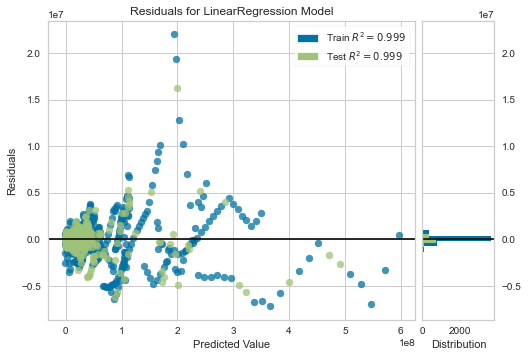

In [19]:
# Visualizing residuals using yellowbrick
visualizer_reg0 = ResidualsPlot(reg0)

_ = visualizer_reg0.fit(X_train, y_train)  
_ = visualizer_reg0.score(X_test, y_test)  
_ = visualizer_reg0.show()

## Using the Basic Linear Regression Model to Predict from 2003's Data

In [20]:
linreg_2008_prediction = abs(reg0.predict(df_2003_X).astype(int))
linreg_2008_prediction

array([  5642070,   1259158,  24552559,    335759,     82052,   9325741,
            8362,  37739644,   1828945,     81970,  17469108,   5438722,
         4468114,     70289,    728105,  41124962,     43604,   7172955,
        10254382,     90972,   3428638,      6946,    194008,   6355458,
         1616688,    269130, 171206999,     79510,   5289229,   2884062,
          561078,    280661,   2682937,   9465685,  26588965,    131239,
         1447757,   2113078,     36228,  14398426, 619830075,  34687513,
           26396,  17855431,   2076414,   2616436,   8836187,   2366579,
         8802769,    506009,   7487645,   4510073,    300924,    159622,
         6428542,   9399518,  32730602,   3750403,     53392,    925663,
          825159,  12459807,    111502,     96039,   4345771,  52710373,
           84050,    570036,    297321,   2128852,  61323192,  10915983,
         6883266,    120839,     87920,    155005,   6326345,   3221736,
          231042,    170289,   4206257,   3412593, 

In [21]:
# Dataframe of country and prediction
country_pop_prediction = pd.DataFrame({'Country': df['country'].unique(), 
                                       'Population in 2008': linreg_2008_prediction})
country_pop_prediction

,Country,Population in 2008
0,Afghanistan,5642070
1,Albania,1259158
2,Algeria,24552559
3,American Samoa,335759
4,Andorra,82052
...,...,...
205,Virgin Islands (U.S.),304226
206,West Bank and Gaza,2568081
207,"Yemen, Rep.",6054675
208,Zambia,4507988


In [22]:
# Urban population data for 2007
pop_2007 = df['Urban population 5 years in the future'].loc[df['year']==2002]
pop_2007

30       5908765
61       1441361
92      24154838
123        53263
154        72597
          ...   
6364      101661
6377     2568098
6408     6367019
6439     4535925
6470     4684302
Name: Urban population 5 years in the future, Length: 210, dtype: int64

In [23]:
# Dataframe showing the country, 2007's actual population, and the model's 2008 prediction
pop_2007_2008 = pd.DataFrame({'Country': df['country'].unique(), 'Population in 2007': pop_2007, 
                              'Population in 2008': linreg_2008_prediction}).reset_index(drop=True)
pop_2007_2008

,Country,Population in 2007,Population in 2008
0,Afghanistan,5908765,5642070
1,Albania,1441361,1259158
2,Algeria,24154838,24552559
3,American Samoa,53263,335759
4,Andorra,72597,82052
...,...,...,...
205,Virgin Islands (U.S.),101661,304226
206,West Bank and Gaza,2568098,2568081
207,"Yemen, Rep.",6367019,6054675
208,Zambia,4535925,4507988


---

# 2. Lasso Model--utilizing StandardScaler, Pipeline and Gridsearch

## Scaling Data, Determining Parameters, and Using Pipeline to Build Lasso Model

In [24]:
# Setting up the steps for the pipeline--ensuring data is scaled because values can range from 0 < x < 1 to 
# x > 1,000,000,000 depending on the feature
# With so many features (230), I am assuming that not all features are important and that some are more important than
# others. For that reason, I have chosen a Lasso Regression model in order to shrink "unimportant" features' 
# coefficients to 0.
steps = [('scaler', StandardScaler()),
        ('lasso', Lasso(tol=0.01))]

In [25]:
# Setting up the pipeline with the steps
pipeline = Pipeline(steps)

In [26]:
# Setting up the parameters: testing 8 possible values to find the best alpha constant 
param_grid = {'lasso__alpha': np.logspace(-7, 7, 8)}

In [27]:
# Using gridsearch and cross validation to find best parameters
gscv = GridSearchCV(pipeline, param_grid, scoring='neg_root_mean_squared_error')

In [28]:
# Fitting the model to the training data
gscv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso(tol=0.01))]),
             param_grid={'lasso__alpha': array([1.e-07, 1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03, 1.e+05, 1.e+07])},
             scoring='neg_root_mean_squared_error')

In [29]:
# Using the model to predict on the unseen test data
y_pred = gscv.predict(X_test)

In [30]:
# Determining the best value for Lasso's constant "alpha"
chosen_alpha = gscv.best_params_['lasso__alpha']
print(gscv.best_params_)

{'lasso__alpha': 100000.0}


In [31]:
# We check the scorer to ensure we are using the RMSE.
gscv.scorer_
# Initial score using GridSearchCV was negative. Please see link below:
# https://stackoverflow.com/questions/21050110/sklearn-gridsearchcv-with-pipeline

make_scorer(mean_squared_error, greater_is_better=False, squared=False)

In [32]:
rmse_score = -gscv.score(X_test, y_test) #looking at rmse metric
r_squared_lasso = r2_score(y_test, y_pred)
print('R-squared:', r_squared_lasso)
print('Root Mean Squared Error:', rmse_score)

R-squared: 0.9976172342050545
Root Mean Squared Error: 1750181.8559731897


In [33]:
# Determining the best Lasso model
lasso_model = gscv.best_estimator_
lasso_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=100000.0, tol=0.01))])

In [34]:
# Using the best model to predict on the data that was held out of the training set in order to test how well model 
# evaluates unseen data
lasso_model.predict(X_test)

array([ 1.01567154e+08,  5.88829976e+07,  3.38628512e+07, ...,
       -2.80803369e+05,  6.30175085e+06,  1.12235337e+07])

In [35]:
# Looking at Lasso coefficients
lasso_coef = lasso_model.named_steps['lasso'].coef_
lasso_coef

array([-0.00000000e+00,  6.11134370e+04,  2.59377504e+05,  0.00000000e+00,
        3.27053033e+07,  0.00000000e+00, -0.00000000e+00, -3.84719380e+05,
        5.75779026e-10, -3.16607880e+06,  1.91551678e+07,  2.87253558e+04,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.12044853e+04,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -9.15756760e+05,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  6.66815807e+04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.84152168e+05,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -9.80947632e+06,  

In [36]:
# Looking for non-zero Lasso coefficients
lasso_coef_num = lasso_coef[lasso_coef != 0]
lasso_coef_num

array([ 6.11134370e+04,  2.59377504e+05,  3.27053033e+07, -3.84719380e+05,
        5.75779026e-10, -3.16607880e+06,  1.91551678e+07,  2.87253558e+04,
        7.12044853e+04, -9.15756760e+05,  6.66815807e+04,  5.84152168e+05,
       -9.80947632e+06, -1.23692843e+05, -1.83595269e+05, -4.70239209e+05,
       -9.07031627e+06, -9.79669302e+05,  2.83613576e+02, -2.64071885e+04,
        1.20511739e+05, -1.02362809e+05,  2.68202224e+04,  5.64663955e+04,
        1.75331332e+05, -2.96021997e+05, -3.01007067e+05, -6.36478731e+05,
       -8.19521579e+04, -1.74731283e+04, -1.72841656e+04,  5.43433325e+04,
       -1.27058252e+05, -3.55171610e+05, -7.21433213e+04, -3.01056328e+04,
        4.75083575e+05,  4.60927542e+04, -5.95153832e+05,  9.91983289e+04,
       -2.90255619e+05])

In [37]:
# Determining how many features have a non-zero Lasso coefficient
len(lasso_coef_num)

41

In [38]:
# Determining the names of the features with non-zero Lasso coefficients
lasso_coef_name = X_train.columns[lasso_coef != 0]
lasso_coef_name

Index(['World bank, 4 income groups 2017',
       'Adjusted savings: mineral depletion (current US$)',
       'Population (Total)', 'Rural population (% of total population)',
       'Urban population (% of total)', 'Rural population', 'Urban population',
       'Urban population growth (annual %)', 'country_Argentina',
       'country_Bangladesh', 'country_Bhutan', 'country_Brazil',
       'country_China', 'country_Congo, Dem. Rep.', 'country_Egypt, Arab Rep.',
       'country_Ethiopia', 'country_India', 'country_Indonesia',
       'country_Iran, Islamic Rep.', 'country_Italy', 'country_Japan',
       'country_Kenya', 'country_Korea, Rep.', 'country_Maldives',
       'country_Mexico', 'country_Myanmar', 'country_Nigeria',
       'country_Pakistan', 'country_Philippines', 'country_Poland',
       'country_Romania', 'country_Saudi Arabia', 'country_Tanzania',
       'country_Thailand', 'country_Uganda', 'country_Ukraine',
       'country_United States', 'country_Venezuela, RB', 'country

In [39]:
# Ensuring that the lengths of the arrays ate the same
assert len(lasso_coef_num) == len(lasso_coef_name)

# Mapping the column name with the associated Lasso coefficient
feature_coef_dict = {lasso_coef_name[i]: lasso_coef_num[i] for i in range(len(lasso_coef_name))}
feature_coef_dict

{'World bank, 4 income groups 2017': 61113.43702069456,
 'Adjusted savings: mineral depletion (current US$)': 259377.50361377557,
 'Population (Total)': 32705303.313617587,
 'Rural population (% of total population)': -384719.37990910385,
 'Urban population (% of total)': 5.757790260373901e-10,
 'Rural population': -3166078.7962525734,
 'Urban population': 19155167.8151746,
 'Urban population growth (annual %)': 28725.355816635383,
 'country_Argentina': 71204.48525460706,
 'country_Bangladesh': -915756.7598416574,
 'country_Bhutan': 66681.58074782489,
 'country_Brazil': 584152.1675506077,
 'country_China': -9809476.318619,
 'country_Congo, Dem. Rep.': -123692.84282727749,
 'country_Egypt, Arab Rep.': -183595.26874985336,
 'country_Ethiopia': -470239.20930828166,
 'country_India': -9070316.274736281,
 'country_Indonesia': -979669.30216603,
 'country_Iran, Islamic Rep.': 283.6135758186534,
 'country_Italy': -26407.188457454682,
 'country_Japan': 120511.73914082162,
 'country_Kenya': -102

Above, we see that 8 features that weren't one-hot encoded were chosen. The model also selected two one-hot encoded regions and 31 one-hot encoded countries. We will keep this in mind for the next model.

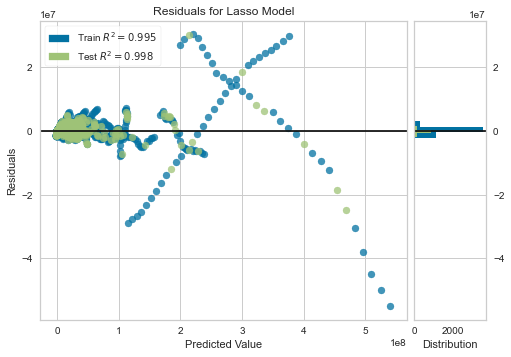

In [40]:
# Visualizing residuals using yellowbrick
visualizer_lasso = ResidualsPlot(lasso_model)

_ = visualizer_lasso.fit(X_train, y_train)  
_ = visualizer_lasso.score(X_test, y_test)  
_ = visualizer_lasso.show()     

## Predicting the Population for 2008 using a Lasso model and data from 2003

In [41]:
# Predicting urban population for 2008
lasso_pop_2008 = abs(lasso_model.predict(df_2003_X).astype(int))
lasso_pop_2008

array([  7342034,   1252175,  22897718,    267973,    395286,   9150224,
          358320,  34700451,   1867784,     80307,  20997582,   5666997,
         4716152,    682650,    949254,  46442945,     94187,   7198782,
         9822027,     40291,   3506274,    477315,    967089,   6250070,
         1722156,    931616, 159427507,    282063,   5666148,   4297525,
         1366530,     48963,   4308753,   9663248,  26454625,    742085,
         1318120,   3000816,    582845,  16841967, 556702361,  32089591,
          586290,  21672521,   1969144,   2844107,   9242341,   2540085,
         9064468,    684186,   7746551,   4694963,    538905,    151933,
         6557606,   9160492,  35755855,   4018829,    256075,    841152,
          932089,  19692222,    485280,     74792,   4420186,  49757416,
          165859,   1182672,    369117,   2250336,  62379798,  11403741,
         7212588,    190270,    306576,    447881,   6790973,   3815370,
           45067,    132802,   4550178,   3685068, 

In [42]:
pop_comparison = pd.DataFrame({'Country': df['country'].unique(), 'Population in 2007': pop_2007, 
                              'Population in 2008 (Lasso)': lasso_pop_2008, 
                              'Population in 2008 (Linear Regression)': 
                               linreg_2008_prediction}).reset_index(drop=True)
pop_comparison

,Country,Population in 2007,Population in 2008 (Lasso),Population in 2008 (Linear Regression)
0,Afghanistan,5908765,7342034,5642070
1,Albania,1441361,1252175,1259158
2,Algeria,24154838,22897718,24552559
3,American Samoa,53263,267973,335759
4,Andorra,72597,395286,82052
...,...,...,...,...
205,Virgin Islands (U.S.),101661,666298,304226
206,West Bank and Gaza,2568098,2276201,2568081
207,"Yemen, Rep.",6367019,8065133,6054675
208,Zambia,4535925,4978386,4507988


In [43]:
# By selecting a country with a much smaller population, we can compare the actual population for 2007 with the
# prediction for 2008 to spot check the model's predictions for smaller countries. 
pop_2007_2008.iloc[6]

Country               Antigua and Barbuda
Population in 2007                  25600
Population in 2008                   8362
Name: 6, dtype: object

Here, we see that the prediction is significantly higher than the previous year's population. This country must have had a great deal on houses if the population increased that much in a single year.

---

# 3. Linear Regression Model with Feature Selection and Scaling

## Scaling Selected Features for Optimized Linear Regression Model

In [44]:
# Narrowing down features from Lasso Model results using the feature selection results from non-zero features in
# Cells 38 and 39
opt_features_df = df[['country', 'year', 'World bank region', 'World bank, 4 income groups 2017', 
                'Adjusted savings: mineral depletion (current US$)', 'Population (Total)', 
                'Rural population (% of total population)', 'Urban population (% of total)', 
                'Rural population', 'Urban population', 'Urban population growth (annual %)',
                 'Urban population 5 years in the future']]
opt_features_df

,country,year,World bank region,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Population (Total),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
0,Afghanistan,1972,South Asia,0,0.000000e+00,11644377.0,88.0702,11.9298,10255226.0,1389151.0,6.634620,1855690
1,Afghanistan,1973,South Asia,0,0.000000e+00,11966352.0,87.6208,12.3792,10485013.0,1481339.0,6.425364,1942479
2,Afghanistan,1974,South Asia,0,0.000000e+00,12273589.0,87.1714,12.8286,10699059.0,1574530.0,6.101041,2014500
3,Afghanistan,1975,South Asia,0,0.000000e+00,12551790.0,86.7220,13.2780,10885163.0,1666627.0,5.684501,2066033
4,Afghanistan,1976,South Asia,0,0.000000e+00,12806810.0,86.2426,13.7574,11044926.0,1761884.0,5.558187,2064276
...,...,...,...,...,...,...,...,...,...,...,...,...
6466,Zimbabwe,1998,Sub-Saharan Africa,0,3.574371e+06,12229500.0,67.0524,32.9476,8200173.0,4029327.0,2.750848,4438019
6467,Zimbabwe,1999,Sub-Saharan Africa,0,1.121581e+07,12384727.0,66.6472,33.3528,8254074.0,4130653.0,2.483614,4498365
6468,Zimbabwe,2000,Sub-Saharan Africa,0,2.259094e+07,12503652.0,66.2420,33.7580,8282669.0,4220983.0,2.163253,4558017
6469,Zimbabwe,2001,Sub-Saharan Africa,0,1.491629e+07,12586763.0,65.8216,34.1784,8284809.0,4301954.0,1.900130,4620705


In [45]:
# Getting dummies for narrowed down dataframe
opt_feat_df_dummies = pd.get_dummies(opt_features_df, columns=['country', 'World bank region'])
opt_feat_df_dummies

,year,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Population (Total),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future,...,"country_Yemen, Rep.",country_Zambia,country_Zimbabwe,World bank region_East Asia & Pacific,World bank region_Europe & Central Asia,World bank region_Latin America & Caribbean,World bank region_Middle East & North Africa,World bank region_North America,World bank region_South Asia,World bank region_Sub-Saharan Africa
0,1972,0,0.000000e+00,11644377.0,88.0702,11.9298,10255226.0,1389151.0,6.634620,1855690,...,0,0,0,0,0,0,0,0,1,0
1,1973,0,0.000000e+00,11966352.0,87.6208,12.3792,10485013.0,1481339.0,6.425364,1942479,...,0,0,0,0,0,0,0,0,1,0
2,1974,0,0.000000e+00,12273589.0,87.1714,12.8286,10699059.0,1574530.0,6.101041,2014500,...,0,0,0,0,0,0,0,0,1,0
3,1975,0,0.000000e+00,12551790.0,86.7220,13.2780,10885163.0,1666627.0,5.684501,2066033,...,0,0,0,0,0,0,0,0,1,0
4,1976,0,0.000000e+00,12806810.0,86.2426,13.7574,11044926.0,1761884.0,5.558187,2064276,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,1998,0,3.574371e+06,12229500.0,67.0524,32.9476,8200173.0,4029327.0,2.750848,4438019,...,0,0,1,0,0,0,0,0,0,1
6467,1999,0,1.121581e+07,12384727.0,66.6472,33.3528,8254074.0,4130653.0,2.483614,4498365,...,0,0,1,0,0,0,0,0,0,1
6468,2000,0,2.259094e+07,12503652.0,66.2420,33.7580,8282669.0,4220983.0,2.163253,4558017,...,0,0,1,0,0,0,0,0,0,1
6469,2001,0,1.491629e+07,12586763.0,65.8216,34.1784,8284809.0,4301954.0,1.900130,4620705,...,0,0,1,0,0,0,0,0,0,1


In [46]:
# Assign predictors to X and target feature to y
X_lr = opt_feat_df_dummies.drop('Urban population 5 years in the future', axis=1)
y_lr = opt_feat_df_dummies['Urban population 5 years in the future']

In [47]:
# Train-test split
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.2, 
                                                                random_state=rand_state)

In [48]:
# Scaling the data and building a linear regression model using the help of a pipeline
lr_pipeline = Pipeline(steps = [('scaler', StandardScaler()),
                                ('linear', LinearRegression())])

lrp_model = lr_pipeline.fit(X_lr_train, y_lr_train)

y_pred_lrp = abs(lr_pipeline.predict(X_lr_test))
r_squared_lrp = lr_pipeline.score(X_lr_test, y_lr_test)
rmse_lrp = np.sqrt(mean_squared_error(y_lr_test, y_pred_lrp))

print('R-squared:', r_squared_lrp)
print('Root Mean Squared Error:', rmse_lrp)

R-squared: 0.9993459350486714
Root Mean Squared Error: 915664.0679792959


In [49]:
# Looking at the coefficients
lrp_coef = lrp_model.named_steps['linear'].coef_
lrp_coef_name = X_lr_train.columns
lrp_feature_coef_dict = {lrp_coef_name[i]: lrp_coef[i] for i in range(len(lrp_coef_name))}
lrp_feature_coef_dict

{'year': -58126.768482118154,
 'World bank, 4 income groups 2017': -7.506746233614327e+18,
 'Adjusted savings: mineral depletion (current US$)': -215761.61027230707,
 'Population (Total)': -2.4202186836683747e+19,
 'Rural population (% of total population)': -1.0722505271128726e+19,
 'Urban population (% of total)': -1.0722505271129289e+19,
 'Rural population': 1.7510305277524048e+19,
 'Urban population': 7.698293839499402e+18,
 'Urban population growth (annual %)': 151536.5392387691,
 'country_Afghanistan': 5.786631925472191e+18,
 'country_Albania': -8.683576966536064e+17,
 'country_Algeria': 8.195480804932193e+17,
 'country_American Samoa': -4.0580794350017536e+17,
 'country_Andorra': -4.6352391606352877e+17,
 'country_Angola': -4.650929555879685e+18,
 'country_Antigua and Barbuda': -1.347931868208239e+18,
 'country_Argentina': -1.7119829404396454e+18,
 'country_Armenia': -1.3983539570105992e+18,
 'country_Aruba': -1.244567919966039e+18,
 'country_Australia': 7.011280657014995e+16,
 

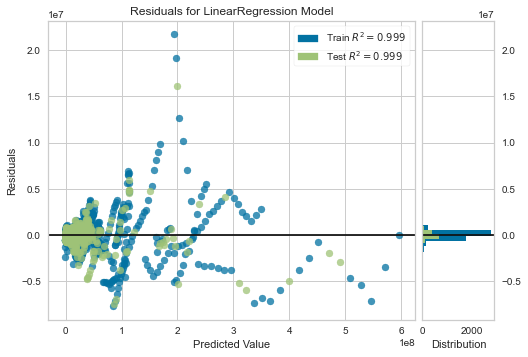

In [50]:
# Visualizing residuals using yellowbrick
visualizer_lrp = ResidualsPlot(lrp_model)

_ = visualizer_lrp.fit(X_lr_train, y_lr_train)  
_ = visualizer_lrp.score(X_lr_test, y_lr_test)  
_ = visualizer_lrp.show()  

## Setting Up 2003's Dataset So That It Contains as Few Features as Our Model Is Using

In [51]:
# Since we are not using all features from the original dataset, we need to remove these extra features from 2003's
# dataset
df_2003_X_cols = df_2003_X.columns.intersection(X_lr.columns)
df_2003_X_lr = df_2003_X[df_2003_X_cols]
df_2003_X_lr

,year,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Population (Total),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),country_Afghanistan,...,"country_Yemen, Rep.",country_Zambia,country_Zimbabwe,World bank region_East Asia & Pacific,World bank region_Europe & Central Asia,World bank region_Latin America & Caribbean,World bank region_Middle East & North Africa,World bank region_North America,World bank region_South Asia,World bank region_Sub-Saharan Africa
0,2003,0,0.000000e+00,23116142.0,78.6376,21.3624,18177979.0,4938163.0,5.254873,1,...,0,0,0,0,0,0,0,0,1,0
1,2003,2,0.000000e+00,3033659.0,55.2212,44.7788,1675223.0,1358436.0,1.703278,0,...,0,0,0,0,1,0,0,0,0,0
2,2003,2,1.792483e+07,33003442.0,35.6718,64.3282,11772922.0,21230520.0,3.164894,0,...,0,0,0,0,0,0,1,0,0,0
3,2003,2,0.000000e+00,59117.0,9.7238,90.2762,5748.0,53369.0,1.217826,0,...,0,0,0,1,0,0,0,0,0,0
4,2003,3,0.000000e+00,75643.0,8.8650,91.1350,6706.0,68937.0,4.978505,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2003,3,0.000000e+00,108085.0,6.4258,93.5742,6945.0,101140.0,0.225685,0,...,0,0,0,0,0,1,0,0,0,0
206,2003,1,0.000000e+00,3154969.0,27.3758,72.6242,863698.0,2291271.0,2.856446,0,...,0,0,0,0,0,0,1,0,0,0
207,2003,1,0.000000e+00,19081306.0,72.1316,27.8684,13763651.0,5317655.0,4.752199,0,...,1,0,0,0,0,0,1,0,0,0
208,2003,1,3.429587e+07,10894519.0,64.1120,35.8880,6984694.0,3909825.0,3.514839,0,...,0,1,0,0,0,0,0,0,0,1


In [52]:
# Predictions using the scaled features in our Linear Regression model
scaled_linreg_2008_prediction = abs(lr_pipeline.predict(df_2003_X_lr).astype(int))
scaled_linreg_2008_prediction

array([  5559105,   1152321,  24999233,    355006,    197953,   9205648,
           21182,  38124865,   1856833,     27969,  17044801,   5338433,
         4564289,      3393,    808257,  41243457,     15681,   7198017,
        10290497,    187713,   3233680,     43710,    208062,   6376769,
         1447233,    309136, 170863937,     27326,   5256513,   2766736,
          595856,    428143,   2749761,   9672592,  27153729,     49854,
         1210256,   1996688,      2750,  13897025, 619541825,  34663745,
          100463,  17831824,   2094992,   2526529,   8820624,   2270529,
         8666433,    603457,   7570753,   4678977,    357697,    430782,
         6421825,   9387329,  32904513,   3706177,     30608,    972688,
          902465,  12367760,    146110,     38209,   4236609,  52794689,
          136513,    669584,    161680,   2082113,  61273409,  11007888,
         6841665,    121534,    172734,    150206,   6237505,   3184528,
           63376,    163137,   4238657,   3382593, 

In [53]:
pop_comparison_m3 = pd.DataFrame({'Country': df['country'].unique(), 'Population in 2007': pop_2007,
                              'Population in 2008 (LR--Feature Selection & Scaling)': 
                                   scaled_linreg_2008_prediction}).reset_index(drop=True)
pop_comparison_m3

,Country,Population in 2007,Population in 2008 (LR--Feature Selection & Scaling)
0,Afghanistan,5908765,5559105
1,Albania,1441361,1152321
2,Algeria,24154838,24999233
3,American Samoa,53263,355006
4,Andorra,72597,197953
...,...,...,...
205,Virgin Islands (U.S.),101661,311998
206,West Bank and Gaza,2568098,2553153
207,"Yemen, Rep.",6367019,6239553
208,Zambia,4535925,4437904


---

# Comparing Models

In [54]:
# Creating a dataframe to compare the results of
pop_comparison_all = pd.DataFrame({'Country': df['country'].unique(), 'Population in 2007': pop_2007, 
                              'Population in 2008 (Basic Linear Regression)': linreg_2008_prediction,
                              'Population in 2008 (Lasso)': lasso_pop_2008, 
                              'Population in 2008 (LR--Feature Selection & Scaling)': 
                                   scaled_linreg_2008_prediction}).reset_index(drop=True)
pop_comparison_all

,Country,Population in 2007,Population in 2008 (Basic Linear Regression),Population in 2008 (Lasso),Population in 2008 (LR--Feature Selection & Scaling)
0,Afghanistan,5908765,5642070,7342034,5559105
1,Albania,1441361,1259158,1252175,1152321
2,Algeria,24154838,24552559,22897718,24999233
3,American Samoa,53263,335759,267973,355006
4,Andorra,72597,82052,395286,197953
...,...,...,...,...,...
205,Virgin Islands (U.S.),101661,304226,666298,311998
206,West Bank and Gaza,2568098,2568081,2276201,2553153
207,"Yemen, Rep.",6367019,6054675,8065133,6239553
208,Zambia,4535925,4507988,4978386,4437904


In [55]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [56]:
scores_df = pd.DataFrame({'Basic Linear Regression': [r_squared_linreg0, rmse0],
                          'Lasso': [r_squared_lasso, rmse_score], 
                          'LinReg w/ Feature Selection & Scaling': [r_squared_lrp, rmse_lrp],
                          'score': ['R_squared', 'RMSE']}).set_index('score')

scores_df

,Basic Linear Regression,Lasso,LinReg w/ Feature Selection & Scaling
score,,,
R_squared,0.99937,0.99762,0.99935
RMSE,896616.41770,1750181.85597,915664.06798


Above, we can see that the basic linear regression model has the best score in terms of both the r-squared and rmse. This, along with a visual analysis of the predictions vs. the actual value the year prior, leads us to conclude that the most basic linear regression model is the best of the three models that we built in this notebook. We did not build a linear regression model just using scaled values or just using feature selection, so these two additional models could be part of a future work to determine whether or not the basic linear regression model is still better by comparison.

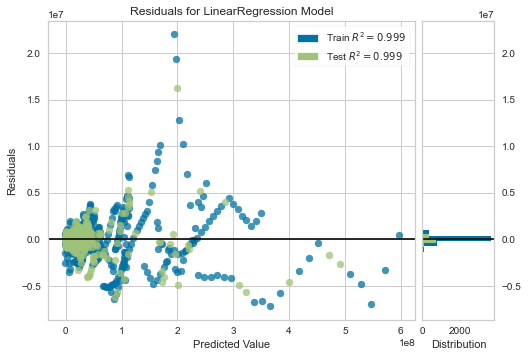

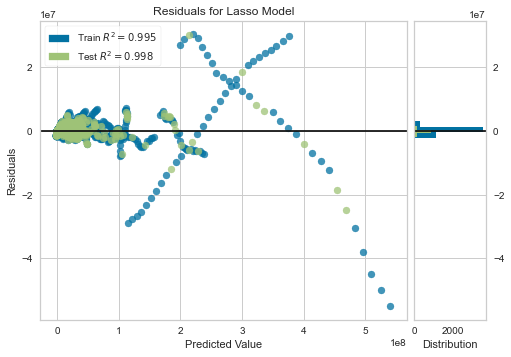

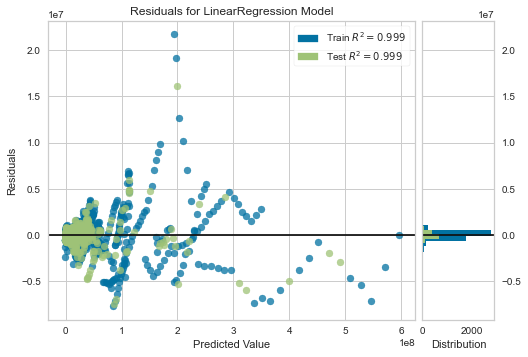

In [57]:
# Visualizing all 3 residual plots using yellowbrick: https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

# Basic Linear Regression with no tuning
visualizer_reg0 = ResidualsPlot(reg0)

_ = visualizer_reg0.fit(X_train, y_train)  
_ = visualizer_reg0.score(X_test, y_test)  
_ = visualizer_reg0.show()


# Lasso using Gridsearch, pipeline, and scaling
visualizer_lasso = ResidualsPlot(lasso_model)

_ = visualizer_lasso.fit(X_train, y_train)  
_ = visualizer_lasso.score(X_test, y_test)  
_ = visualizer_lasso.show()  


# Linear regression using scaling and feature selection
visualizer_lrp = ResidualsPlot(lrp_model)

_ = visualizer_lrp.fit(X_lr_train, y_lr_train)  
_ = visualizer_lrp.score(X_lr_test, y_lr_test)  
_ = visualizer_lrp.show() 

Because each country's population over time has a slightly different slope, we can observe several sets of points that seem to be related as they are relatively close together and loosely form a line as opposed to simply being a random scattering of points. This is especially evident in the Lasso model's residuals plot. There are 31 years in our dataset, and we can see 2 long lines, each composed of 31 points. These are 2 distinct countries for which our Lasso model offers a very poor fit and are most likely skewing the model's fit. (A third distinct line composed of tighter points can also be seen.) We can see that as the predicted value increases, there is often a higher residual, meaning that there is a larger difference between the measured and predicted values. Our two linear models also exhibit sets of points that could be attributed to the trends of distinct countries, but none of the residual trends are as extreme as in the Lasso model.


All 3 models have fairly high R-squared values with the two Linear Regression models outperforming the Lasso. This could be due to trends in the [time series] data. A good way to check for this would be to build a time series model for this data in a future project.

## Notes:

- Because data was backfilled for each country, this could lead to data being skewed towards this artificial mode for each country.

- Because we are using Linear Regression, some predicted values are negative. This is possible to resolve by finding the absolute value of the predicted feature.

- Since we trained and fit the models across all countries, predictions for some countries are more accurate than for others. One way to fix this would be to customize the model for each country. 

- Typically urban population will increase over time. However, there are exceptions. For example, if something catastrophic happens, if there is a large number of people emigrating from the country, or if there is a societal shift in which citizens leave the city for more rural areas.

- If we want to work on optimizing the models, we could look into the percentage increase in urban populations from previous years to determine just how feasible our predictions are.

- When comparing the Lasso prediction and basic Linear Regression predictions for each country, we see that from the 10 rows we can see above, the LinReg model's prediction is typically closer to the population in 2007 than the Lasso model's. This could be because the Lasso model only looked at a few one-hot-encoded countries, which will give a very limited understanding of the dataset and the country associated with each year's values.

- The first Linear Regression model was trained across all features while the second was trained on a slightly smaller set of features. The features were also scaled in the second model. It is also possible to continue looking for a better Linear Regression model by creating one with scaled features and the full dataset and creating another without scaling and with fewer features. These models would be created similarly to the second linear regression model above.

- It is also possible to use time series analysis to predict population. However, that is currently out of the scope of this project.